In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, scipy.stats as st
import seaborn as sns
from scipy import stats

from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from IPython.display import display, HTML

## palette_c = ['#ceddf0', '#94cce7', '#21a2d0', '#128aa3', '#1c62ba']
palette_c = ['#ceddf0', '#ffeac5', '#ffeac5', '#fdd05a', '#fdd05a']

app = ['AliExpress', 'Temu']

df_user = pd.read_csv('./users-time.csv', sep = ';', index_col = 0)
display(df_user)
df = df_user.iloc[:,:6]
df

,Task 1 AliExpress,Task 2 AliExpress,Task 3 AliExpress,Task 1 Temu,Task 2 Temu,Task 3 Temu,Sesso,Eta,Lavoro,Istruzione
User,,,,,,,,,,
ED1,1.30-C,2.21-C,1.20-C,1.30-C,1.51-C,2.50-A,M,52,Lavoratore,Diploma
ED2,0.41-C,1.35-C,0.39-C,0.36-C,1.33-C,0.27-C,M,21,Studente,Diploma
ED3,0.43-C,1.09-C,0.42-C,1.02-C,1.48-C,1.07-C,F,22,Studente,Diploma
ED4,1.15-C,1.52-C,0.32-C,0.34-C,0.52-C,0.30-C,M,22,Studente,Diploma
U1,0.55-C,0.59-C,1.07-A,0.35-C,0.59-C,0.52-C,M,22,Studente,Diploma
U2,0.39-C,0.58-C,0.26-C,1.32-C,1.58-C,0.40-C,M,21,Studente,Diploma
U3,0.38-C,1.33-C,0.31-C,1.14-C,1.24-C,0.38-C,M,22,Studente,Diploma
U4,1.35-C,2.29-A,0.45-C,0.45-C,1.38-C,0.49-C,F,48,Lavoratore,Laurea
U5,0.45-C,1.45-C,0.50-C,1.04-C,1.42-C,0.35-C,M,21,Studente,Diploma


,Task 1 AliExpress,Task 2 AliExpress,Task 3 AliExpress,Task 1 Temu,Task 2 Temu,Task 3 Temu
User,,,,,,
ED1,1.30-C,2.21-C,1.20-C,1.30-C,1.51-C,2.50-A
ED2,0.41-C,1.35-C,0.39-C,0.36-C,1.33-C,0.27-C
ED3,0.43-C,1.09-C,0.42-C,1.02-C,1.48-C,1.07-C
ED4,1.15-C,1.52-C,0.32-C,0.34-C,0.52-C,0.30-C
U1,0.55-C,0.59-C,1.07-A,0.35-C,0.59-C,0.52-C
U2,0.39-C,0.58-C,0.26-C,1.32-C,1.58-C,0.40-C
U3,0.38-C,1.33-C,0.31-C,1.14-C,1.24-C,0.38-C
U4,1.35-C,2.29-A,0.45-C,0.45-C,1.38-C,0.49-C
U5,0.45-C,1.45-C,0.50-C,1.04-C,1.42-C,0.35-C


In [2]:
# creating df with only-time

# get_time_s('2.03-A') -> 123 (secons)
def get_time_s(text):
    times = text.split('-')[0].split('.')
    seconds = int(times[0]) * 60
    seconds += int(times[1])
    return seconds

df_time = df.map(get_time_s)
df_time

,Task 1 AliExpress,Task 2 AliExpress,Task 3 AliExpress,Task 1 Temu,Task 2 Temu,Task 3 Temu
User,,,,,,
ED1,90,141,80,90,111,170
ED2,41,95,39,36,93,27
ED3,43,69,42,62,108,67
ED4,75,112,32,34,52,30
U1,55,59,67,35,59,52
U2,39,58,26,92,118,40
U3,38,93,31,74,84,38
U4,95,149,45,45,98,49
U5,45,105,50,64,102,35


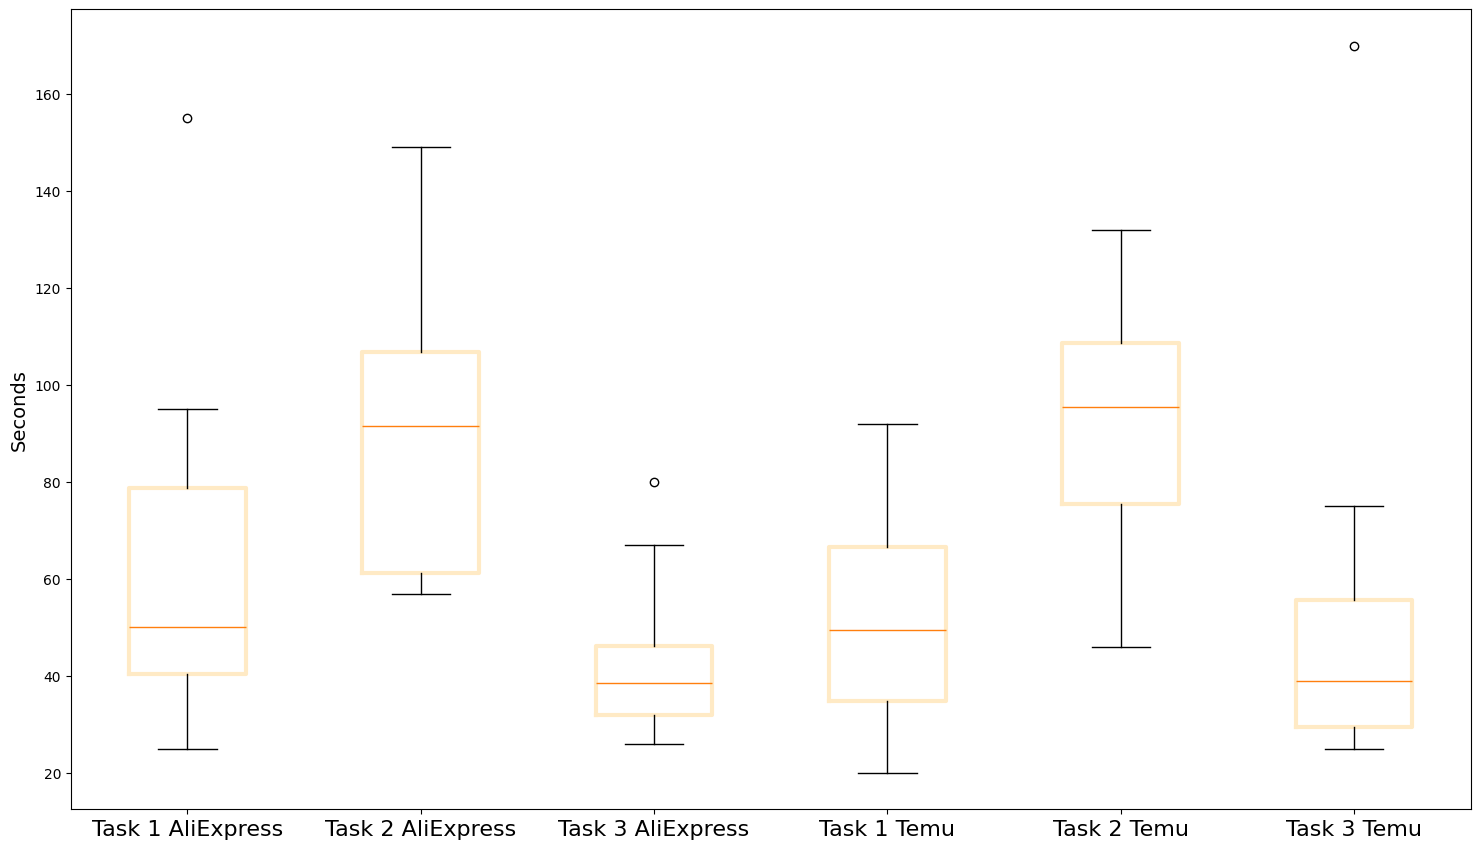

In [3]:
# default pandas:
# df_time.boxplot(figsize=(17,10))

fig = plt.figure(figsize = (14, 8))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df_time)
for box in bp['boxes']:
    # change outline color
    box.set(color='#7570a3', linewidth=3)
    # change fill color
    #box.set(color = 'b')
bp['boxes'][0].set(color = palette_c[1])
bp['boxes'][1].set(color = palette_c[1])
bp['boxes'][2].set(color = palette_c[1])
bp['boxes'][3].set(color = palette_c[2])
bp['boxes'][4].set(color = palette_c[2])
bp['boxes'][5].set(color = palette_c[2])
#plt.grid()
plt.ylabel('Seconds', fontsize = 14)
ax.set_xticklabels(df_time.columns, fontsize = 16)
colors = ['deepskyblue', 'royalblue', 'steelblue', 'deepskyblue', 'royalblue', 'steelblue']
#for xtick, color in zip(ax.get_xticklabels(), colors):
#    xtick.set_color(color)
plt.show()

Task e tempi di esecuzione (Efficienza):

Task 1


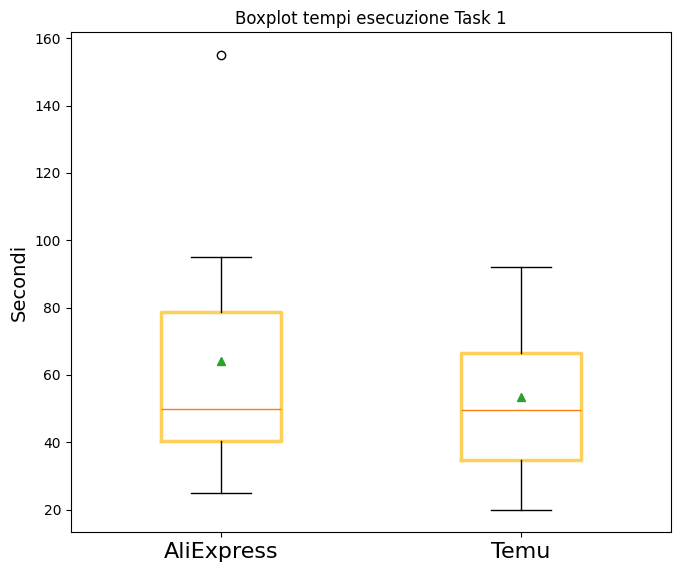

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,25,155,64.25,36.065912,50.0,"[41.335, 87.165]",+/- 22.915
Temu,20,92,53.333333,23.395156,49.5,"[38.469, 68.198]",+/- 14.865




______________________________________________________________________________

Task 2


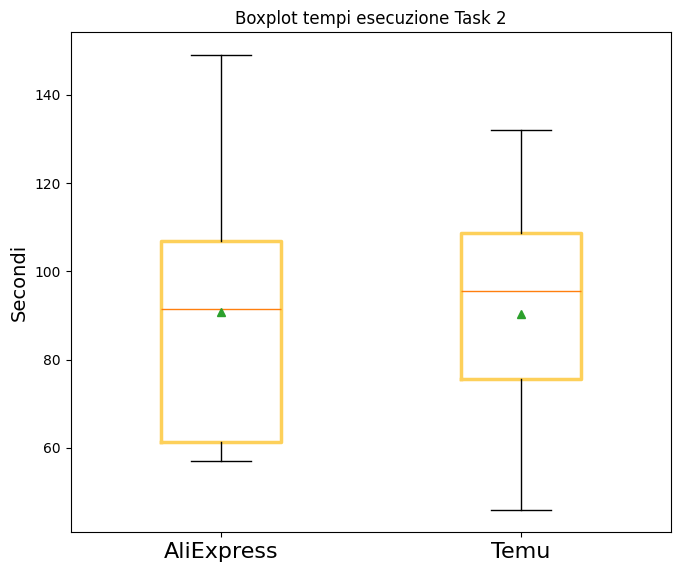

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,57,149,90.833333,31.788601,91.5,"[70.636, 111.031]",+/- 20.198
Temu,46,132,90.333333,26.945512,95.5,"[73.213, 107.454]",+/- 17.121




______________________________________________________________________________

Task 3


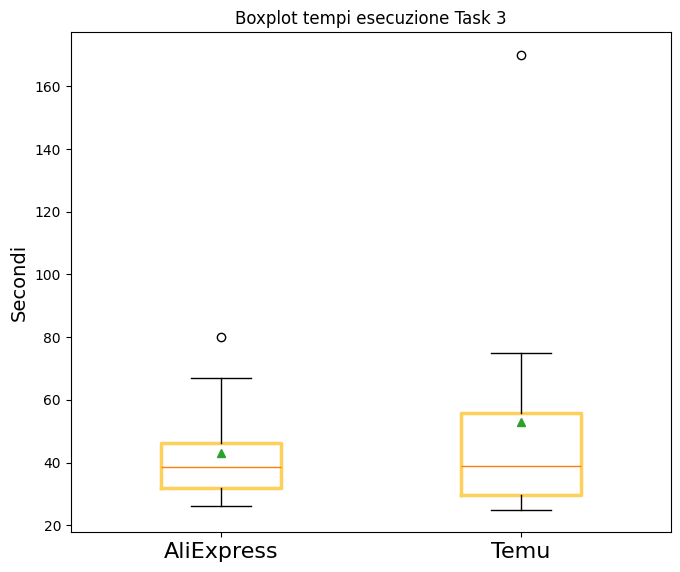

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,26,80,42.916667,15.996922,38.5,"[32.753, 53.081]",+/- 10.164
Temu,25,170,53.0,40.133867,39.0,"[27.5, 78.5]",+/- 25.5


In [4]:
def task_boxplot(num_task):
    fig = plt.figure(figsize = (6, 5), dpi=100)
    ax = fig.add_axes([0, 0, 1, 1])
    dati = df_time[[f'Task {num_task} {app[0]}', f'Task {num_task} {app[1]}']]
    bp = ax.boxplot(dati, widths = 0.4, showmeans=True)
    for box in bp['boxes']:
        # change outline color
        box.set(color=palette_c[3], linewidth=2.5)
    plt.ylabel('Secondi', fontsize = 14)
    ax.set_xticklabels(app, fontsize = 16)
    plt.title(f'Boxplot tempi esecuzione Task {num_task}')
    plt.show()

    stats = pd.DataFrame(index=app, columns=['Min', 'Max', 'Media', 'Std', 'Mediana', 'Intervallo (0.95)', 'Error'])
    for ele in app:
        stats.loc[ele, 'Min'] = dati[f'Task {num_task} {ele}'].min()
        stats.loc[ele, 'Max'] = dati[f'Task {num_task} {ele}'].max()
        stats.loc[ele, 'Media'] = dati[f'Task {num_task} {ele}'].mean()
        stats.loc[ele, 'Std'] = dati[f'Task {num_task} {ele}'].std()
        stats.loc[ele, 'Mediana'] = dati[f'Task {num_task} {ele}'].median()
        stats.loc[ele, 'Intervallo (0.95)'] = np.around(st.t.interval(0.95, len(dati[f'Task {num_task} {ele}'])-1, loc = np.mean(dati[f'Task {num_task} {ele}']), scale = st.sem(dati[f'Task {num_task} {ele}'])), 3)
        stats.loc[ele, 'Error'] = '+/- ' + str(np.around(stats.loc[ele, 'Intervallo (0.95)'][1] - stats.loc[ele, 'Media'], 3))
    return stats

print('Task e tempi di esecuzione (Efficienza):\n')
print('Task 1')
display(task_boxplot(1))
print('\n\n______________________________________________________________________________\n')
print('Task 2')
display(task_boxplot(2))
print('\n\n______________________________________________________________________________\n')
print('Task 3')
display(task_boxplot(3))


In [5]:
def get_help(text):
    h = text.split('-')[1]
    if h == 'C':
        # completato
        h = 1
    elif h == 'A':
        # aiutato
        h = 2
    elif h == 'F':
        # fail
        h = 3
    return h

df_help = df.map(get_help)
df_help

,Task 1 AliExpress,Task 2 AliExpress,Task 3 AliExpress,Task 1 Temu,Task 2 Temu,Task 3 Temu
User,,,,,,
ED1,1,1,1,1,1,2
ED2,1,1,1,1,1,1
ED3,1,1,1,1,1,1
ED4,1,1,1,1,1,1
U1,1,1,2,1,1,1
U2,1,1,1,1,1,1
U3,1,1,1,1,1,1
U4,1,2,1,1,1,1
U5,1,1,1,1,1,1


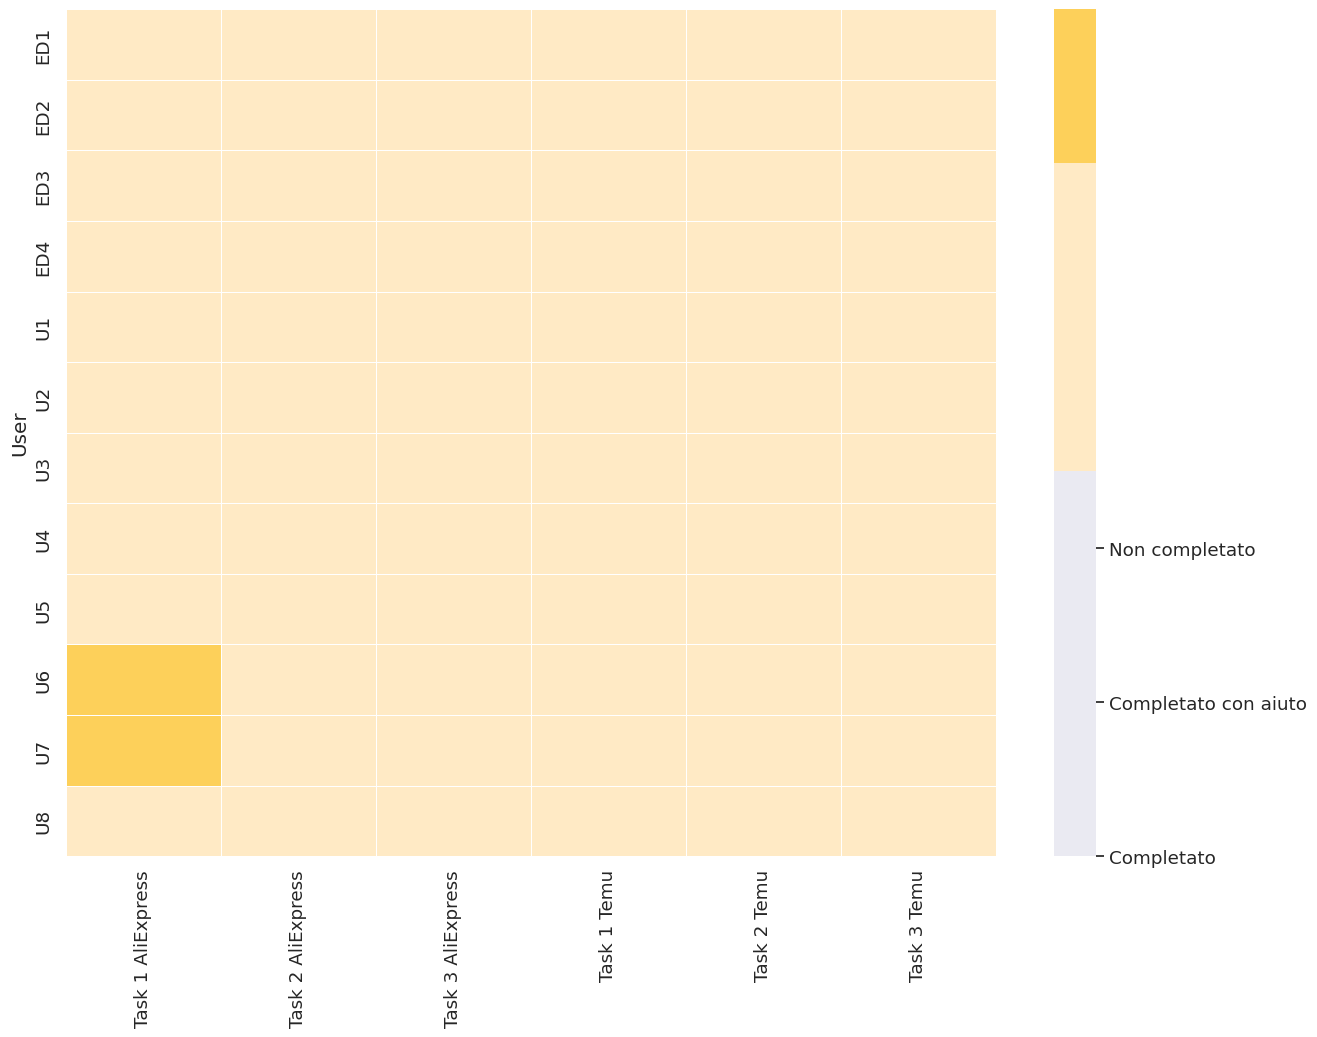

In [6]:
myColors = (palette_c[1], palette_c[2], palette_c[4])

sns.set(font_scale=1.2)
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
fig, ax = plt.subplots(figsize = (15, 11)) 
ax = sns.heatmap(df_help, linewidths=.5, fmt='g', cmap=cmap, ax = ax)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.667, 0, 0.667])
colorbar.set_ticklabels(['Completato', 'Completato con aiuto', 'Non completato'])

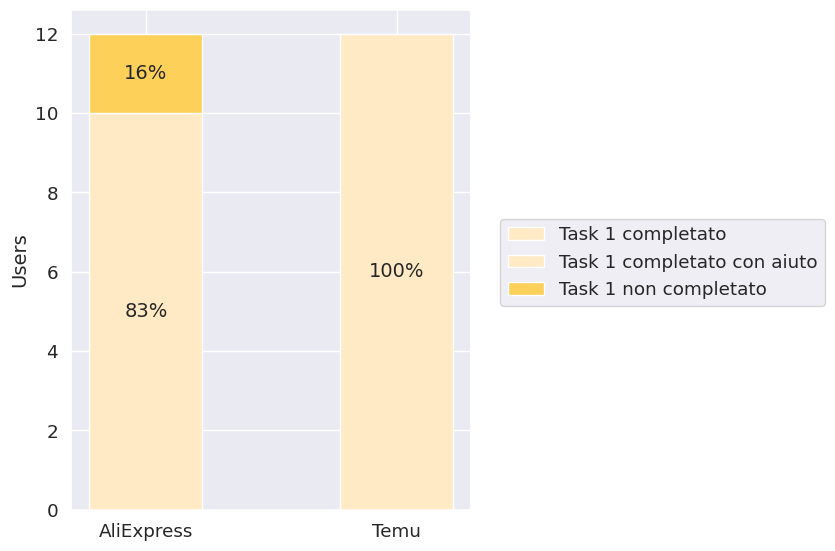

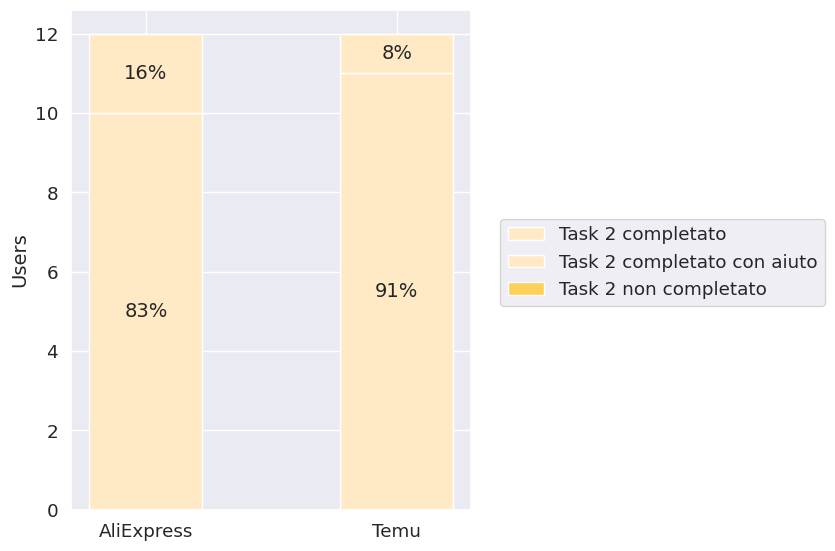

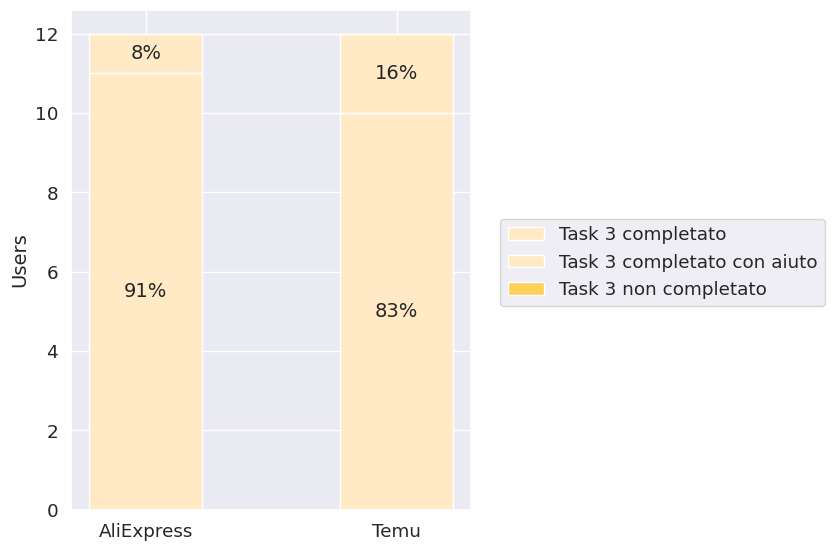

In [7]:

def barplot_task(num_task, df_help):

    # count the number of complete (1), help (2) and uncomplete(3) for each app
    count_music = {}
    count_tidal = {}
    width = 0.45
    tot_users = len(df_help)

    # number of users that completed the task n 1 of apple music
    # number of users that got help in task n 1 of apple music
    # number of users that didn't complete the task n 1 of apple music
    count_music['comp'] = len(df_help[df_help[f'Task {num_task} {app[0]}'] == 1])
    count_music['help'] = len(df_help[df_help[f'Task {num_task} {app[0]}'] == 2])
    count_music['uncomp'] = len(df_help[df_help[f'Task {num_task} {app[0]}'] == 3])

    count_tidal['comp'] = len(df_help[df_help[f'Task {num_task} {app[1]}'] == 1])
    count_tidal['help'] = len(df_help[df_help[f'Task {num_task} {app[1]}'] == 2])
    count_tidal['uncomp'] = len(df_help[df_help[f'Task {num_task} {app[1]}'] == 3])

    fig = plt.figure(figsize = (4, 5), dpi = 100)
    ax = fig.add_axes([0, 0, 1, 1])

    # Apple Music completed, helped, uncompleted
    percent = int(count_music['comp']/tot_users*100)
    if percent != 0:
        ax.bar(1, count_music['comp'], width, label = f'Task {num_task} completato ({app[0]})', color = palette_c[1])
        plt.annotate(f'{percent}%', (1, count_music['comp']/2), ha='center', va='center', size = 14)

    tot_helped = tot_users - count_music['comp'] - count_music['uncomp']
    start_base = count_music['comp']
    percent = int(tot_helped/tot_users*100)
    if percent != 0:
        ax.bar(1, tot_helped, width, bottom = start_base, label = f'Task {num_task} completato con aiuto ({app[0]})', color = palette_c[2])
        plt.annotate(f'{percent}%', (1, tot_helped/2 + start_base), ha='center', va='center', size = 14)

    tot_uncomp = tot_users - count_music['comp'] - count_music['help']
    start_base = count_music['comp'] + tot_helped
    percent = int(tot_uncomp/tot_users*100)
    if percent != 0:
        ax.bar(1, tot_uncomp, width, bottom = start_base, label = f'Task {num_task} non completato ({app[0]})', color = palette_c[3])
        plt.annotate(f'{percent}%', (1, tot_uncomp/2 + start_base), ha='center', va='center', size = 14)


    # Tidal completed, helped, uncompleted
    percent = int(count_tidal['comp']/tot_users*100)
    if percent != 0:
        ax.bar(2, count_tidal['comp'], width, label = f'Task {num_task} completato ({app[1]})', color = palette_c[1])
        plt.annotate(f'{percent}%', (2, count_tidal['comp']/2), ha='center', va='center', size = 14)

    tot_helped = tot_users - count_tidal['comp'] - count_tidal['uncomp']
    start_base = count_tidal['comp']
    percent = int(tot_helped/tot_users*100)
    if percent != 0:
        ax.bar(2, tot_helped, width, bottom = start_base, label = f'Task {num_task} completato con aiuto ({app[1]})', color = palette_c[2])
        plt.annotate(f'{percent}%', (2, tot_helped/2 + start_base), ha='center', va='center', size = 14)

    tot_uncomp = tot_users - count_tidal['comp'] - count_tidal['help']
    start_base = count_tidal['comp'] + tot_helped
    percent = int(tot_uncomp/tot_users*100)
    if percent != 0:
        ax.bar(2, tot_uncomp, width, bottom = start_base, label = f'Task {num_task} non completato ({app[1]})', color = palette_c[3])
        plt.annotate(f'{percent}%', (2, tot_uncomp/2 + start_base), ha='center', va='center', size = 14)

    plt.ylabel("Users", size=14)
    plt.xticks([1, 2], app)
    custom_lines = [Patch(facecolor=palette_c[1]),
                    Patch(facecolor=palette_c[2]),
                    Patch(facecolor=palette_c[3])]
    plt.legend(custom_lines, [f'Task {num_task} completato', f'Task {num_task} completato con aiuto', f'Task {num_task} non completato'], bbox_to_anchor=(1.05, .6))
    plt.show()
    

barplot_task(1, df_help)
barplot_task(2, df_help)
barplot_task(3, df_help)

## Test di Fisher per confrontare rapporto tra successi ed errori
Ci sono 2 variabili: il sistema e l'esito del test. Gli utenti aiutai vengono associati per comodità agli insuccessi

|            | Apple Music | Tidal |    |
|------------|-------------|-------|----|
| Successi   | 8           | 10    | 18 |
| Insuccessi | 4           | 2     | 6  |
|            | 12          | 12    | 24 |

per effettuare il test: ```oddsratio, pvalue = stats.fisher_exact([[8, 10], [4, 2]])``` rispettando la tabella riportata sopra

In [8]:
def perform_fisher(num_task, df_help):
    count_music = {}
    count_tidal = {}

    count_music['comp'] = len(df_help[df_help[f'Task {num_task} {app[0]}'] == 1])
    count_music['uncomp'] = len(df_help[df_help[f'Task {num_task} {app[0]}'] == 3])
    count_music['uncomp'] += len(df_help[df_help[f'Task {num_task} {app[0]}'] == 2])

    count_tidal['comp'] = len(df_help[df_help[f'Task {num_task} {app[1]}'] == 1])
    count_tidal['uncomp'] = len(df_help[df_help[f'Task {num_task} {app[1]}'] == 3])
    count_tidal['uncomp'] += len(df_help[df_help[f'Task {num_task} {app[1]}'] == 2])

    matrix = [[count_music['comp'], count_tidal['comp']], [count_music['uncomp'], count_tidal['uncomp']]]
    oddsratio, pvalue = stats.fisher_exact(matrix, alternative = 'two-sided')
    return pvalue


alpha = 0.05
print('Testing the first task...')
pvalue = perform_fisher(1, df_help)
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')

print('\n\n')

# testing the second task
print('Testing the second task...')
pvalue = perform_fisher(2, df_help)
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')

print('\n\n')

# testing the third task
print('Testing the third task...')
pvalue = perform_fisher(3, df_help)
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')


Testing the first task...
Result pvalue: 0.47826086956521735
p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant



Testing the second task...
Result pvalue: 1.0
p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant



Testing the third task...
Result pvalue: 1.0
p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


In [9]:
# performing t_test on user time (using related one becouse we have related samples)

alpha = 0.05

print('Task 1')
statistic, pvalue = stats.ttest_rel(df_time[f'Task 1 {app[0]}'], df_time[f'Task 1 {app[1]}'])
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')

print('\n\n')

print('Task 2')
statistic, pvalue = stats.ttest_rel(df_time[f'Task 2 {app[0]}'], df_time[f'Task 2 {app[1]}'])
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')

print('\n\n')

print('Task 3')
statistic, pvalue = stats.ttest_rel(df_time[f'Task 3 {app[0]}'], df_time[f'Task 3 {app[1]}'])
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')


Task 1
Result pvalue: 0.38862303628559947
p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant



Task 2
Result pvalue: 0.9633189997927095
p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant



Task 3
Result pvalue: 0.28025645511632613
p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


## Stats on gender, age and education

In [10]:
# Now using df_user to make stats on gender, age and education
df_user

,Task 1 AliExpress,Task 2 AliExpress,Task 3 AliExpress,Task 1 Temu,Task 2 Temu,Task 3 Temu,Sesso,Eta,Lavoro,Istruzione
User,,,,,,,,,,
ED1,1.30-C,2.21-C,1.20-C,1.30-C,1.51-C,2.50-A,M,52,Lavoratore,Diploma
ED2,0.41-C,1.35-C,0.39-C,0.36-C,1.33-C,0.27-C,M,21,Studente,Diploma
ED3,0.43-C,1.09-C,0.42-C,1.02-C,1.48-C,1.07-C,F,22,Studente,Diploma
ED4,1.15-C,1.52-C,0.32-C,0.34-C,0.52-C,0.30-C,M,22,Studente,Diploma
U1,0.55-C,0.59-C,1.07-A,0.35-C,0.59-C,0.52-C,M,22,Studente,Diploma
U2,0.39-C,0.58-C,0.26-C,1.32-C,1.58-C,0.40-C,M,21,Studente,Diploma
U3,0.38-C,1.33-C,0.31-C,1.14-C,1.24-C,0.38-C,M,22,Studente,Diploma
U4,1.35-C,2.29-A,0.45-C,0.45-C,1.38-C,0.49-C,F,48,Lavoratore,Laurea
U5,0.45-C,1.45-C,0.50-C,1.04-C,1.42-C,0.35-C,M,21,Studente,Diploma


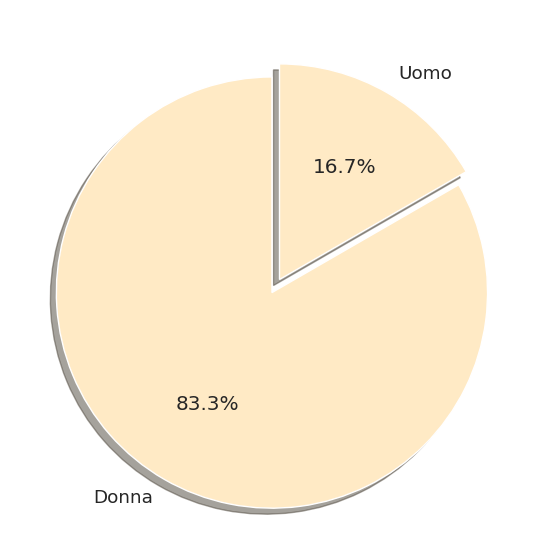

In [11]:
# Using sex instaed of gende
labels = ['Donna', 'Uomo']
sizes = df_user['Sesso'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07
fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)

ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c[1:3])
plt.show()


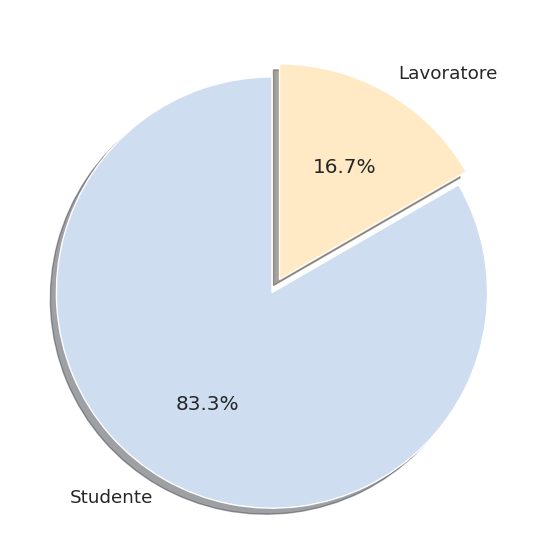

In [12]:
# job stats
labels = df_user['Lavoro'].value_counts().index
sizes = df_user['Lavoro'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()

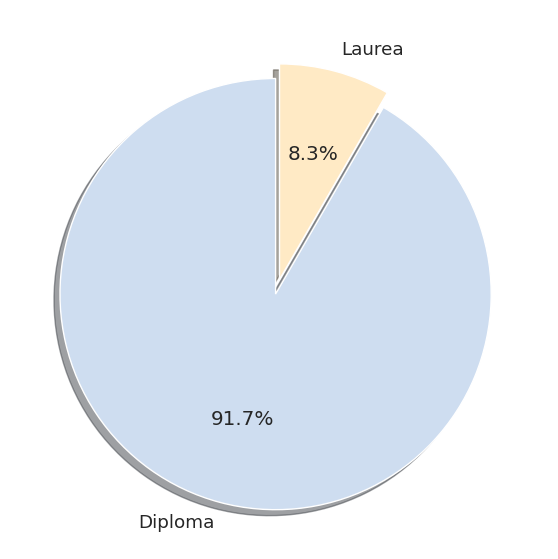

In [13]:
# education stats
labels = df_user['Istruzione'].value_counts().index
sizes = df_user['Istruzione'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()

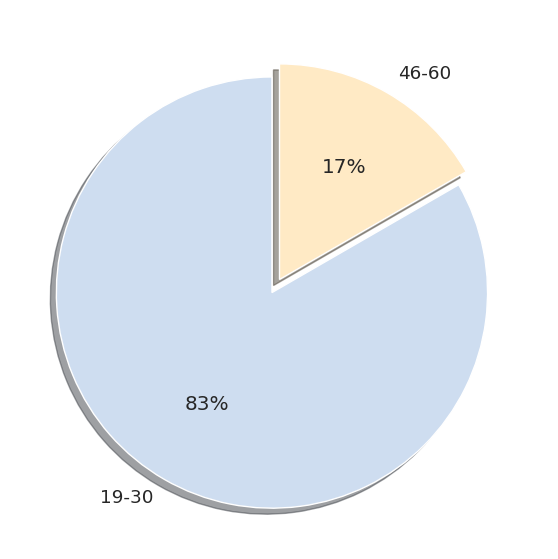

In [14]:
# age stats
age_class = [10, 18, 30, 45, 60, 110]
labels = ['10-18', '19-30', '31-45', '46-60', '60+']
df_age = pd.DataFrame({'age': df_user['Eta'], 'group': pd.cut(df_user['Eta'], bins = age_class, labels = labels, right=False)})

sizes = df_age['group'].value_counts()
sizes = sizes[sizes != 0] # drop 0 value
labels = list(sizes.index)

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.0f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()

# Questionario euristiche stats:

In [15]:
## inizio statistiche su questionario

# df_q = pd.read_csv('./Questionario valutazione euristica.csv')
# df_q.columns
# df_q = df_q.drop(['Informazioni cronologiche', 'Nome utente'], axis = 1)
# 
# df_qq = pd.DataFrame()
# for ele in df_q.columns:
#     row = [ele]
#     row.extend([int(asd[0]) for asd in df_q[ele].tolist()])
#     df_qq = df_qq.append(pd.DataFrame([row]), ignore_index=True)
# df_qq['Euristiche'] = ''
# df_qq['Id valutatori'] = ''
# df_qq.columns = ['Problema', 'expert1', 'expert2', 'expert3', 'expert4', 'expert5', 'Euristiche', 'Id valutatori']
# df_qq

In [16]:
# mean and sd

#df_qq['mean'] = df_qq.loc
# df_qq['mean'] = df_qq.loc[:, 'expert1':'expert5'].mean(axis=1)
# df_qq['std'] = df_qq.loc[:, 'expert1':'expert5'].std(axis=1)
# df_qq['median'] = df_qq.loc[:, 'expert1':'expert5'].median(axis=1)
# df_qq.to_csv('./Risultato questionario euristica.csv')
# df_qq

In [17]:
# a = pd.read_csv('./Euristiche tidal.csv', sep = ';')
# a['ID euristiche violate']

In [18]:
# eu = pd.read_csv('./eu.csv')
# idd = pd.read_csv('./ID.csv')
# # df_qq.iloc[23:,:]['Euristiche'] = b['ID euristiche violate']
# # display(eu)
# # display(idd)
# df_qq['Euristiche'] = eu['hello']
# df_qq['Id valutatori'] = idd['hi']
# df_qq.to_csv('./Risultato questionario euristica.csv')

In [19]:
# Splitting into two df, one for tidal and the oth for apple music 

# quest = pd.read_csv('./Risultato questionario euristica.csv')
# quest = quest.drop(['Unnamed: 0'], axis = 1)
# # quest.nlargest(4, 'mean')
# quest_0 = quest.iloc[:23, :]
# quest_1 = quest.iloc[23:, :]
# quest_0.to_csv('./Quest eu Tidal.csv')
# quest_1.to_csv('./Quest eu Apple Music.csv')

In [20]:
# matrice valutatori
import pandas as pd
def matrice_valutatori(app_name):
    quest1 = pd.read_csv('./Quest eu ' + app_name + '.csv', index_col=0)

    # creo un df vuoto per la matrice valutatori
    matrix1 = pd.DataFrame(columns = quest1.index.tolist(), index = ['EU1', 'EU2', 'ED1', 'ED2', 'ED3'])

    # costruisco la matrice valutatori
    for index, row in quest1.iterrows():
        valutatori = row['Id valutatori'].split('-')
        for val in valutatori:
            matrix1.loc[val, index] = 1

    matrix1 = matrix1.fillna(0)
    display(matrix1)

    # ordino la matrice valutatori
    idx = matrix1.sum(axis=1).sort_values(ascending=False).index
    print('----------------------------------------------')
    print(f'Top valutatori: {", ".join(idx.to_list())}')
    print('----------------------------------------------')
    ordered_matrix1 = matrix1.loc[idx]
    print('Matrice valutatori ordinata:')
    display(ordered_matrix1)
    return ordered_matrix1

print(f'______________{app[0].upper()}:')
matrix_applemusic = matrice_valutatori(app[0])
print('\n\n\n\n')
print(f'______________{app[1].upper()}:')
matrix_tidal = matrice_valutatori(app[1])


______________ALIEXPRESS:


/tmp/ipykernel_243623/20663966.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix1 = matrix1.fillna(0)


,PB1,PB2,PB3,PB4,PB5,PB6,PB7,PB8,PB9,PB10,...,PB28,PB29,PB30,PB31,PB32,PB33,PB34,PB35,PB36,PB37
EU1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
EU2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ED1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ED2,1,0,0,0,0,1,0,0,0,1,...,1,1,1,1,1,0,1,0,0,0
ED3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
ED4,0,0,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,1


----------------------------------------------
Top valutatori: EU2, EU1, ED2, ED3, ED4, ED1
----------------------------------------------
Matrice valutatori ordinata:


,PB1,PB2,PB3,PB4,PB5,PB6,PB7,PB8,PB9,PB10,...,PB28,PB29,PB30,PB31,PB32,PB33,PB34,PB35,PB36,PB37
EU2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
EU1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
ED2,1,0,0,0,0,1,0,0,0,1,...,1,1,1,1,1,0,1,0,0,0
ED3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
ED4,0,0,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,1
ED1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0







______________TEMU:


/tmp/ipykernel_243623/20663966.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix1 = matrix1.fillna(0)


,PB01,PB02,PB03,PB04,PB05,PB06,PB07,PB08,PB09,PB10,...,PB19,PB20,PB21,PB22,PB23,PB24,PB25,PB26,PB27,PB28
EU1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
EU2,0,1,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
ED1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
ED2,0,1,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,0,0,0
ED3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
ED4,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,1


----------------------------------------------
Top valutatori: EU1, ED2, EU2, ED4, ED1, ED3
----------------------------------------------
Matrice valutatori ordinata:


,PB01,PB02,PB03,PB04,PB05,PB06,PB07,PB08,PB09,PB10,...,PB19,PB20,PB21,PB22,PB23,PB24,PB25,PB26,PB27,PB28
EU1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ED2,0,1,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,0,0,0
EU2,0,1,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
ED4,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,1
ED1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
ED3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


AliExpress


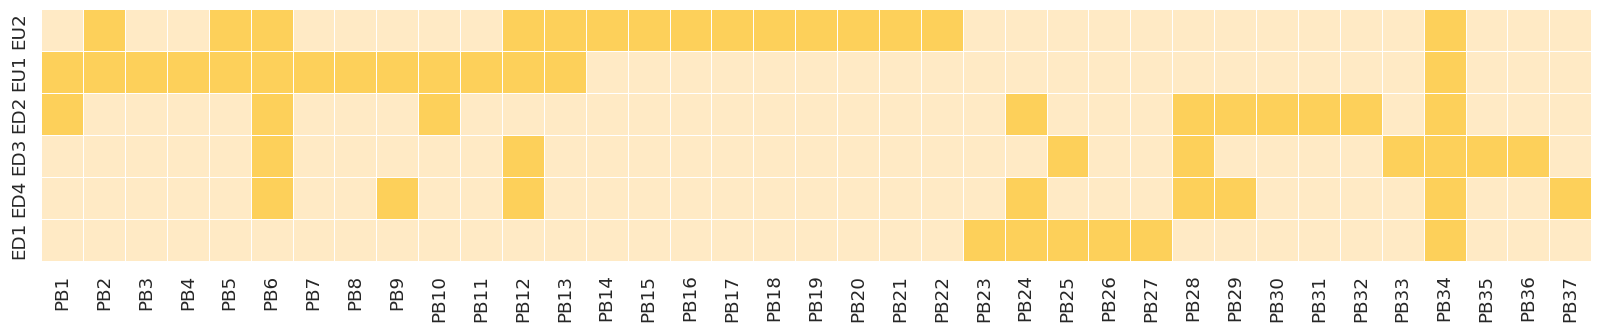

In [21]:
# grafico matrice valutatori apple music
print(app[0])
myColors = (palette_c[1], palette_c[2], palette_c[4])

sns.set(font_scale=1.2)
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
fig, ax = plt.subplots(figsize = (20, 5)) 
ax = sns.heatmap(matrix_applemusic, linewidths=.5, fmt='g', cmap=cmap, ax = ax, cbar = False, square = True)

Temu


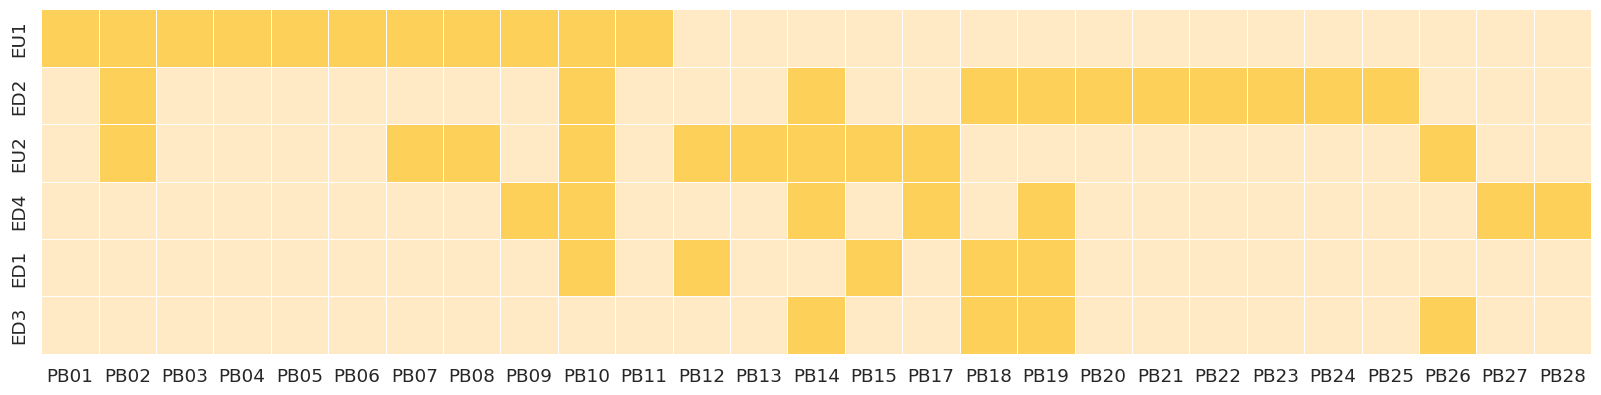

In [22]:
# grafico matrice valutatori apple music
print(app[1])
myColors = (palette_c[1], palette_c[2], palette_c[4])

sns.set(font_scale=1.2)
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
fig, ax = plt.subplots(figsize = (20, 5)) 
ax = sns.heatmap(matrix_tidal, linewidths=.5, fmt='g', cmap=cmap, ax = ax, cbar = False, square = True)

AliExpress


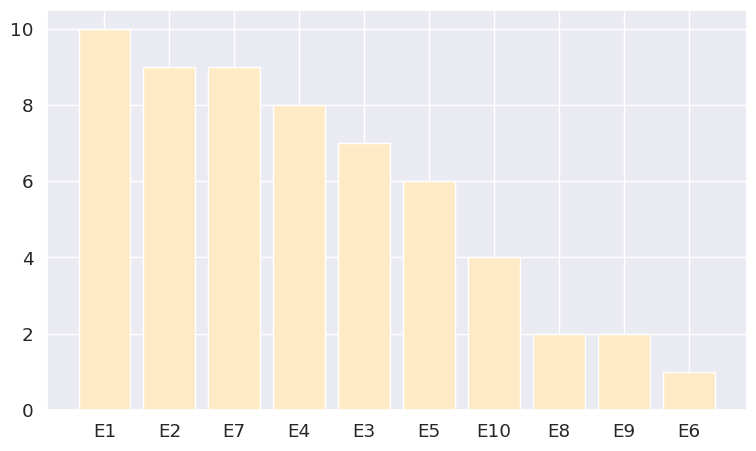

Temu


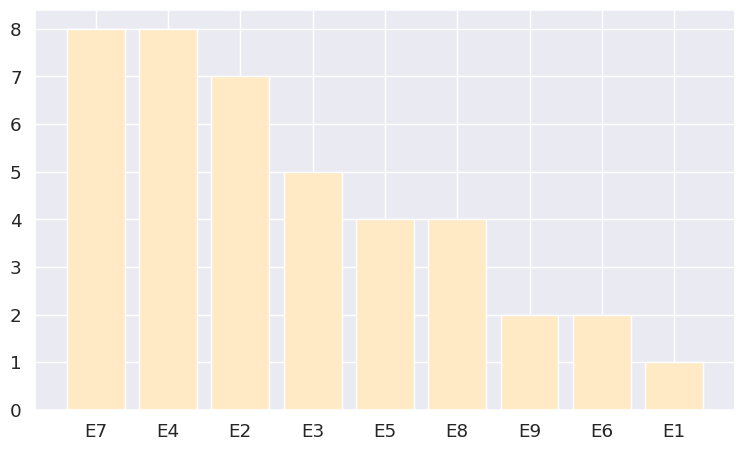

In [23]:
# distribuzione euristiche

def plot_eu_distribution(app_name):
    quest1 = pd.read_csv('./Quest eu ' + app_name + '.csv', index_col=0)
    list_eu = []
    for eu in quest1['Euristiche']:
        list_eu.extend(eu.split('-'))

    from collections import Counter, OrderedDict

    c = Counter(list_eu)
    # ordered by value
    c_ord = dict(sorted(c.items(), key=lambda item: item[1], reverse = True))

    fig = plt.figure(figsize = (7, 4), dpi = 100)
    ax = fig.add_axes([0, 0, 1, 1])
    plt.bar(c_ord.keys(), c_ord.values(), color = palette_c[2])
    plt.show()

print(f'{app[0]}')
plot_eu_distribution(app[0])
print(f'{app[1]}')
plot_eu_distribution(app[1])

In [24]:
# prioritizzazione euristiche

def prioritizzazione_eu(app_name):
    quest1 = pd.read_csv('./Quest eu ' + app_name + '.csv', index_col=0)
    top_problems = []
    no_top_problems = []
    
    for expert in quest1.columns[1:6]:
        # Top 6 problems (20% di 30 euristiche)
        tmp = quest1.sort_values(expert, ascending=False)[:6].index.tolist()
        top_problems.extend(tmp)
        # The rest:
        tmp = quest1.sort_values(expert, ascending=False)[6:].index.tolist()
        no_top_problems.extend(tmp)

    # Count number of time a problem appears on top or not
    c_top = dict(Counter(top_problems))
    c_no_top = dict(Counter(no_top_problems))

    df_fascia = pd.DataFrame(0, index=quest1.index, columns=['volte prima fascia', 'volte seconda fascia', 'fascia finale'])
    
    for ele in c_top:
        df_fascia.loc[ele, 'volte prima fascia'] += c_top[ele]

    for ele in c_no_top:
        df_fascia.loc[ele, 'volte seconda fascia'] += c_no_top[ele]

    df_fascia['p-value'] = 0.0
    for index, _ in df_fascia.iterrows():
        p_value = stats.binomtest(df_fascia.at[index, 'volte prima fascia'], n=5, p=0.5).pvalue
        df_fascia.at[index, 'p-value'] = p_value
        if df_fascia.at[index, 'volte prima fascia'] > df_fascia.at[index, 'volte seconda fascia']:
            df_fascia.at[index, 'fascia finale'] = -1
        else:
            df_fascia.at[index, 'fascia finale'] = -2

    return df_fascia

print(f'{app[0]}:')
display(prioritizzazione_eu(app[0]).sort_values('fascia finale', ascending = False))
print('\n______________________________\n')
print(f'{app[1]}:')
display(prioritizzazione_eu(app[1]).sort_values('fascia finale', ascending = False))

AliExpress:


,volte prima fascia,volte seconda fascia,fascia finale,p-value
PB3,3,2,-1,1.0000
PB16,3,2,-1,1.0000
PB12,5,0,-1,0.0625
PB13,5,0,-1,0.0625
PB6,4,1,-1,0.3750
PB5,0,5,-2,0.0625
PB4,0,5,-2,0.0625
PB2,0,5,-2,0.0625
PB1,0,5,-2,0.0625
PB9,2,3,-2,1.0000



______________________________

Temu:


,volte prima fascia,volte seconda fascia,fascia finale,p-value
PB10,4,1,-1,0.3750
PB19,3,2,-1,1.0000
PB12,5,0,-1,0.0625
PB26,4,1,-1,0.3750
PB25,3,2,-1,1.0000
PB06,0,5,-2,0.0625
PB05,0,5,-2,0.0625
PB03,0,5,-2,0.0625
PB04,0,5,-2,0.0625
PB02,0,5,-2,0.0625


In [25]:
quest1 = pd.read_csv('./Quest eu ' + app[0] + '.csv', index_col=0)
quest1

,Problema,Expert 1,Expert 2,Expert 3,Expert 4,Expert 5,Expert 6,Euristiche,Id valutatori
PB1,Cancella cronologia non aggiornato correttamente,1,2,1,1,0,2,E1-E2,EU1-ED2
PB2,Navbar sezione Acquista,3,2,3,3,3,1,E1-E2-E3,EU1-EU2
PB3,"Ambiguità ""Visualizza altro"" e ""freccia"" categ...",4,1,4,4,3,3,E1-E5-E8,EU1
PB4,"Ambiguità ""I migliori abbinamenti""",3,2,2,3,1,2,E1-E3,EU1
PB5,Pulsante info poco visibile,1,1,1,1,2,1,E10,EU1-EU2
PB6,Muri di testo,4,3,4,4,4,4,E7-E10,EU1-EU2-ED2-ED3-ED4
PB7,Visualizzazione risultati,3,2,4,3,2,2,E4,EU1
PB8,Filtri nascondibili accidentalmente,2,2,1,2,1,1,E3-E4,EU1
PB9,"Prodotti consigliati ne ""i miei ordini""",4,1,3,4,1,3,E1-E7,EU1-ED4
PB10,Visualizzazione parziale nomi lunghi del prodotto,0,3,1,0,0,2,E1,EU1-ED2


In [26]:
quest2 = pd.read_csv('./Quest eu ' + app[1] + '.csv', index_col=0)
quest2

,Problema,Expert 1,Expert 2,Expert 3,Expert 4,Expert 5,Expert 6,Euristiche,Id valutatori
PB01,Aggiornamento con trascinamento ambiguo,1,1,2,1,0,2,E1-E2,EU1
PB02,Spedizione gratuita navbar poco leggibile,2,3,3,3,2,2,E2-E7,EU1-EU2-ED2
PB03,Icona elenco ambigua,3,1,3,3,2,1,E5,EU1
PB04,Gestione carrello superflua,1,2,2,2,2,1,E7,EU1
PB05,Visualizzazione parziale nomi lunghi del prodotto,0,3,1,2,1,2,E7,EU1
PB06,Tasto salva nei preferiti poco visibile,3,1,3,3,2,1,E2,EU1
PB07,Icona notifiche messaggi ambigua,1,1,0,0,2,2,E2-E4,EU1-EU2
PB08,Manca conferma elimina elemento dal carrello,3,3,4,2,3,3,E8-E9,EU1-EU2
PB09,Pulsante carrello poco visibile,2,2,3,2,3,2,E4-E8,EU1-ED4
PB10,Navbar ambigue filtri e categorie,3,4,3,3,2,2,E5-E6-E7,EU1-EU2-ED1-ED2-ED4


,Sesso
expert1,M
expert2,M
expert3,M
expert4,M
expert5,M


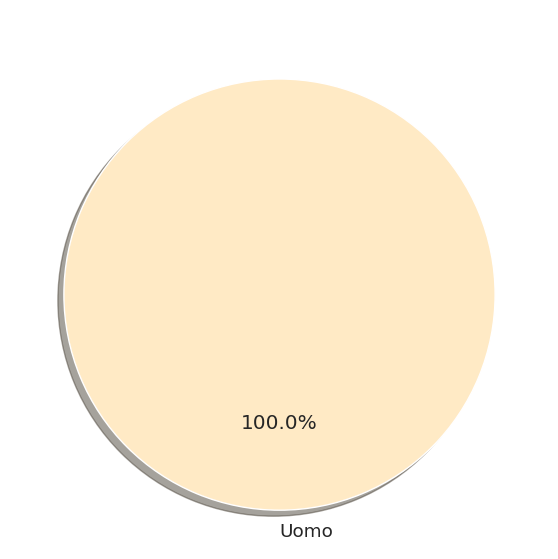

,Sesso,Lavoro
expert1,M,Studente
expert2,M,Lavoratore
expert3,M,Studente
expert4,M,Studente
expert5,M,Lavoratore


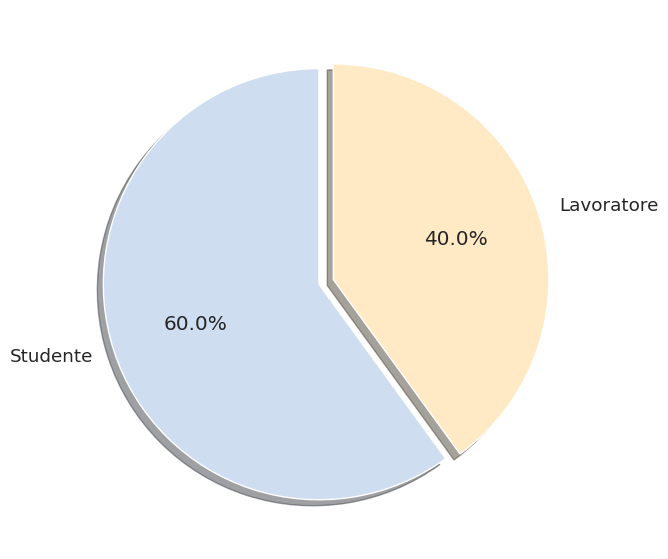

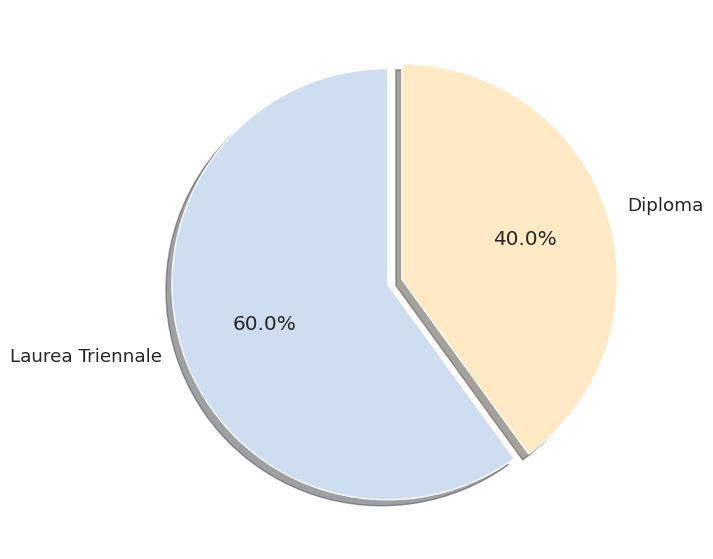

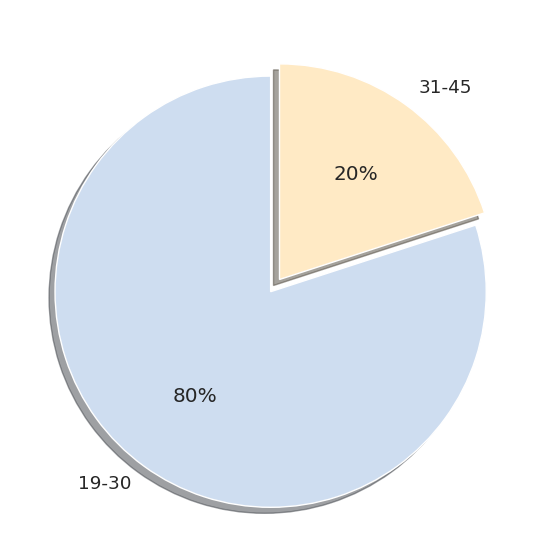

In [27]:
# stats on the fly su valutatori usabilità e dominio

# Using sex instead of gender
labels = ['Donna', 'Uomo']
# display(df_user['Sesso'])
tmp_dict = {'expert1': ['M'], 'expert2': ['M'], 'expert3': ['M'], 'expert4': ['M'], 'expert5': ['M']}
tmp_df_eu = pd.DataFrame.from_dict(tmp_dict).T
tmp_df_eu.columns = ['Sesso']
display(tmp_df_eu)
sizes = tmp_df_eu['Sesso'].value_counts()
if len(sizes) == 1:
    labels = ['Uomo']

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07
fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)

ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c[1:3])
plt.show()



# job stats
tmp_df_eu['Lavoro'] = ['Studente', 'Lavoratore', 'Studente', 'Studente', 'Lavoratore']
display(tmp_df_eu)
labels = tmp_df_eu['Lavoro'].value_counts().index
sizes = tmp_df_eu['Lavoro'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()





# education stats
tmp_df_eu['Istruzione'] = ['Diploma', 'Laurea Triennale', 'Laurea Triennale', 'Diploma', 'Laurea Triennale']
labels = tmp_df_eu['Istruzione'].value_counts().index
sizes = tmp_df_eu['Istruzione'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()





# age stats
age_class = [10, 18, 30, 45, 60, 110]
labels = ['10-18', '19-30', '31-45', '46-60', '60+']
tmp_df_eu['Eta'] = [21, 27, 23, 26, 31]
df_age = pd.DataFrame({'age': tmp_df_eu['Eta'], 'group': pd.cut(tmp_df_eu['Eta'], bins = age_class, labels = labels, right=False)})

sizes = df_age['group'].value_counts()
sizes = sizes[sizes != 0] # drop 0 value
labels = list(sizes.index)

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.0f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()